In [ ]:
# Suppression des avertissements
import warnings
warnings.filterwarnings('ignore')

# Bibliothèques standards
import numpy as np
import pandas as pd
from datetime import datetime

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement des données
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Séparation des données et validation croisée
from sklearn.model_selection import train_test_split, StratifiedKFold

# Modèles de classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Évaluation des modèles
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)


In [ ]:
# Importer le dataset
#df1 = pd.read_excel('data/données_chèque_stage.xls')
#df2 = pd.read_excel('data/données_LDC_stage.xls')

# Save them as .xlsx files
#df1.to_excel('data/données_chèque_stage.xlsx', index=False, engine='openpyxl')
#df2.to_excel('data/données_LDC_stage.xlsx', index=False, engine='openpyxl')

# Import the converted datasets
df1 = pd.read_excel('data/données_chèque_stage.xlsx', engine='openpyxl')
df2 = pd.read_excel('data/données_LDC_stage.xlsx', engine='openpyxl')


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
# Vérifier les premières lignes
df1.head()

# Vérifier les informations sur le dataset
df1.info()

# Vérifier les statistiques descriptives
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50253 entries, 0 to 50252
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   NBRE         50213 non-null  float64       
 1   MCR          50213 non-null  float64       
 2   MDB          50213 non-null  float64       
 3   VALEUR       50253 non-null  int64         
 4   DATECPS      50253 non-null  datetime64[ns]
 5   NUM          50253 non-null  int64         
 6   MNT          49521 non-null  float64       
 7   ID           50253 non-null  int64         
 8   DNA          31752 non-null  object        
 9   PROVISIONNE  21391 non-null  float64       
 10  PROFESSION   41528 non-null  object        
 11  LIBCCL       50236 non-null  object        
 12  SORT         50253 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 5.0+ MB


,NBRE,MCR,MDB,VALEUR,DATECPS,NUM,MNT,ID,PROVISIONNE
count,50213.000000,5.021300e+04,5.021300e+04,50253.0,50253,5.025300e+04,4.952100e+04,5.025300e+04,21391.0
mean,312.347639,4.417925e+06,5.428699e+06,30.0,2024-12-15 07:52:26.104710144,6.497059e+06,3.437451e+04,3.877509e+06,1.0
min,13.000000,0.000000e+00,1.149248e+03,30.0,2024-10-01 00:00:00,1.900000e+01,6.000000e-02,3.690000e+02,1.0
25%,54.000000,4.646420e+04,4.560294e+04,30.0,2024-11-04 00:00:00,6.351813e+06,4.656000e+02,1.097830e+06,1.0
50%,69.000000,9.110710e+04,9.124224e+04,30.0,2024-12-09 00:00:00,6.733913e+06,2.754200e+03,4.590973e+06,1.0
75%,141.000000,2.786869e+05,2.827489e+05,30.0,2025-01-15 00:00:00,7.000649e+06,4.986700e+03,6.192783e+06,1.0
max,113018.000000,2.541437e+09,2.537465e+09,30.0,2025-04-25 00:00:00,7.995979e+06,4.600000e+07,6.988269e+06,1.0
std,2121.423428,4.998041e+07,5.267235e+07,0.0,NaN,9.812790e+05,7.290768e+05,2.477617e+06,0.0


In [4]:
# Vérifier les premières lignes
df2.head()

# Vérifier les informations sur le dataset
df2.info()

# Vérifier les statistiques descriptives
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   NBRE        8864 non-null   float64       
 1   MCR         8864 non-null   float64       
 2   MDB         8864 non-null   float64       
 3   VALEUR      8927 non-null   int64         
 4   DATECPS     8927 non-null   datetime64[ns]
 5   NUM         0 non-null      float64       
 6   MNT         8925 non-null   float64       
 7   ID          8901 non-null   float64       
 8   DNA         8540 non-null   datetime64[ns]
 9   PROFESSION  8195 non-null   object        
 10  LIBCCL      8858 non-null   object        
 11  SORT        8927 non-null   object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(3)
memory usage: 837.0+ KB


,NBRE,MCR,MDB,VALEUR,DATECPS,NUM,MNT,ID,DNA
count,8864.000000,8.864000e+03,8.864000e+03,8927.000000,8927,0.0,8925.000000,8.901000e+03,8540
mean,43.807310,4.827420e+04,4.738282e+04,40.996863,2025-01-09 08:47:38.384675840,NaN,1569.842667,8.754051e+10,1979-04-19 18:56:21.217798656
min,1.000000,0.000000e+00,0.000000e+00,40.000000,2024-10-01 00:00:00,NaN,24.500000,3.690000e+02,1900-06-20 00:00:00
25%,19.000000,5.423027e+03,5.247775e+03,41.000000,2024-12-02 00:00:00,NaN,90.700000,1.858184e+06,1970-11-18 00:00:00
50%,27.000000,9.717702e+03,8.963404e+03,41.000000,2025-01-16 00:00:00,NaN,143.430000,3.922730e+06,1980-11-02 00:00:00
75%,47.000000,1.282768e+04,1.309075e+04,41.000000,2025-02-28 00:00:00,NaN,500.000000,5.833789e+06,1987-07-06 12:00:00
max,1057.000000,4.486243e+06,4.458645e+06,41.000000,2025-03-28 00:00:00,NaN,75000.000000,1.881328e+13,2004-11-16 00:00:00
std,77.377669,3.178323e+05,3.150377e+05,0.055920,NaN,NaN,4883.869200,1.274948e+12,NaN


In [5]:
# Remplacer NaN dans la colonne PROVISIONNE par 0
df1['PROVISIONNE'] = df1['PROVISIONNE'].fillna(0).astype(int)

# Remplacer NaN dans la colonne PROFESSION par AUTRE PROFESSION
df1['PROFESSION'] = df1['PROFESSION'].fillna('AUTRE PROFESSION')

# Vérification du type des colonnes
df1['MCR'] = df1['MCR'].astype(str).str.replace(' ', '').str.replace(',', '.')
df1['MDB'] = df1['MDB'].astype(str).str.replace(' ', '').str.replace(',', '.')
df1['MNT'] = df1['MNT'].astype(str).str.replace(',', '.')

# Conversion en float
df1['MCR'] = pd.to_numeric(df1['MCR'], errors='coerce')
df1['MDB'] = pd.to_numeric(df1['MDB'], errors='coerce')
df1['MNT'] = pd.to_numeric(df1['MNT'], errors='coerce')

# Calculer l'âge à partir de la date de naissance (DNA)
df1['DNA'] = pd.to_datetime(df1['DNA'], errors='coerce')
df1['AGE'] = (pd.Timestamp.today() - df1['DNA']).dt.days // 365

In [6]:
# Remplacer NaN dans la colonne LIBCCL par Personne physique (la meme personne)
df1['LIBCCL'] = df1['LIBCCL'].fillna('Personne physique')
df1.isna().sum()

NBRE              40
MCR               40
MDB               40
VALEUR             0
DATECPS            0
NUM                0
MNT              732
ID                 0
DNA            18501
PROVISIONNE        0
PROFESSION         0
LIBCCL             0
SORT               0
AGE            18501
dtype: int64

In [7]:
# Encodage des variables catégorielles (PROFESSION, LIBCCL)
le_profession = LabelEncoder()  # Création de l'encodeur
df1['le_PROFESSION'] = le_profession.fit_transform(df1['PROFESSION'].fillna(''))

le_libccl = LabelEncoder()  # Création de l'encodeur pour LIBCCL
df1['le_LIBCCL'] = le_libccl.fit_transform(df1['LIBCCL'].fillna(''))

# Encoder la variable cible 'SORT'
df1['SORT'] = df1['SORT'].map({'P': 0, 'CNP': 1, 'AUTRE REJET': 1, 'PREAVIS': 1})

In [8]:
df1.SORT

0        0
1        0
2        0
3        0
4        0
        ..
50248    0
50249    0
50250    0
50251    0
50252    0
Name: SORT, Length: 50253, dtype: int64

In [9]:
# Select only numeric columns
numeric_cols = df1.select_dtypes(include=['number']).columns

# Compute skewness only on numeric columns
skew_values = df1[numeric_cols].skew()

print("Skewness of numeric columns:")
print(skew_values)


Skewness of numeric columns:
NBRE             37.795877
MCR              42.440214
MDB              36.599130
VALEUR            0.000000
NUM              -2.963965
MNT              45.414844
ID               -0.304458
PROVISIONNE       0.300686
SORT              8.941069
AGE               0.318522
le_PROFESSION     7.857655
le_LIBCCL        -1.441373
dtype: float64


In [10]:
df1.head()

,NBRE,MCR,MDB,VALEUR,DATECPS,NUM,MNT,ID,DNA,PROVISIONNE,PROFESSION,LIBCCL,SORT,AGE,le_PROFESSION,le_LIBCCL
0,42.0,18274.785,18896.693,30,2024-10-01,5687977,300.0,1994064,1980-08-28,0,AUTRE PROFESSION,Personne physique,0,44.0,1,3
1,768.0,6669595.616,7392793.016,30,2024-10-01,6690327,3213.0,1999037,NaT,0,AUTRE PROFESSION,Personne morale société,0,NaN,1,2
2,102.0,10060.215,12062.296,30,2024-10-01,6474297,100.0,2083314,1976-11-18,0,AUTRE PROFESSION,Personne physique,0,48.0,1,3
3,120.0,21432.459,23465.461,30,2024-10-01,6067813,200.0,1018499,1981-06-26,0,AUTRE PROFESSION,Personne physique,0,43.0,1,3
4,120.0,21432.459,23465.461,30,2024-10-01,6067805,1100.0,1018499,1981-06-26,0,AUTRE PROFESSION,Personne physique,0,43.0,1,3


In [11]:
# Manual list from your skewness output
median_cols = ['NBRE', 'MCR', 'MDB', 'MNT', 'SORT', 'le_PROFESSION', 'le_LIBCCL', 'NUM']
mean_cols = ['VALEUR', 'ID', 'PROVISIONNE', 'AGE']

# Impute using median for skewed columns
for col in median_cols:
    df1[col] = df1[col].fillna(df1[col].median())
    print(f"{col}: Filled NaN with median (high skew)")

# Impute using mean for relatively normal columns
for col in mean_cols:
    df1[col] = df1[col].fillna(df1[col].mean())
    print(f"{col}: Filled NaN with mean (low skew)")


NBRE: Filled NaN with median (high skew)
MCR: Filled NaN with median (high skew)
MDB: Filled NaN with median (high skew)
MNT: Filled NaN with median (high skew)
SORT: Filled NaN with median (high skew)
le_PROFESSION: Filled NaN with median (high skew)
le_LIBCCL: Filled NaN with median (high skew)
NUM: Filled NaN with median (high skew)
VALEUR: Filled NaN with mean (low skew)
ID: Filled NaN with mean (low skew)
PROVISIONNE: Filled NaN with mean (low skew)
AGE: Filled NaN with mean (low skew)


In [15]:
print(df1)

        NBRE          MCR          MDB  VALEUR    DATECPS      NUM     MNT  \
0       42.0    18274.785    18896.693      30 2024-10-01  5687977   300.0   
1      768.0  6669595.616  7392793.016      30 2024-10-01  6690327  3213.0   
2      102.0    10060.215    12062.296      30 2024-10-01  6474297   100.0   
3      120.0    21432.459    23465.461      30 2024-10-01  6067813   200.0   
4      120.0    21432.459    23465.461      30 2024-10-01  6067805  1100.0   
...      ...          ...          ...     ...        ...      ...     ...   
50248   52.0    52065.000    51872.300      30 2025-04-25  7529227  2754.2   
50249   70.0   131737.820   131514.420      30 2025-04-25  7520675  2754.2   
50250   54.0    58088.000    57909.780      30 2025-04-25  7525777  2754.2   
50251  188.0  1252375.830   948662.620      30 2025-04-25  7541093  2754.2   
50252  188.0  1252375.830   948662.620      30 2025-04-25  7541095  2754.2   

            ID        DNA  PROVISIONNE        PROFESSION  \
0  


=== Fold 1 ===

- KNN (k=5)
Matrice de confusion :
 [[9645  285]
 [  42   79]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      9930
           1       0.22      0.65      0.33       121

    accuracy                           0.97     10051
   macro avg       0.61      0.81      0.65     10051
weighted avg       0.99      0.97      0.98     10051



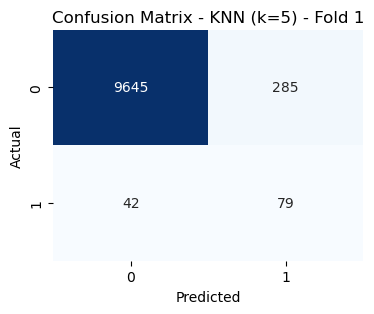


- Random Forest
Matrice de confusion :
 [[9841   89]
 [  44   77]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      9930
           1       0.46      0.64      0.54       121

    accuracy                           0.99     10051
   macro avg       0.73      0.81      0.76     10051
weighted avg       0.99      0.99      0.99     10051



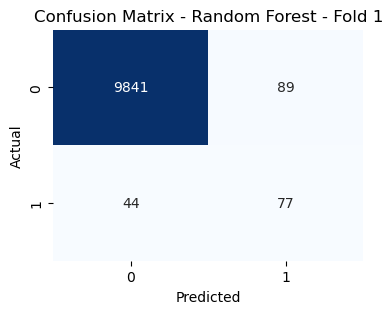


- Logistic Regression
Matrice de confusion :
 [[7004 2926]
 [  56   65]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.71      0.82      9930
           1       0.02      0.54      0.04       121

    accuracy                           0.70     10051
   macro avg       0.51      0.62      0.43     10051
weighted avg       0.98      0.70      0.82     10051



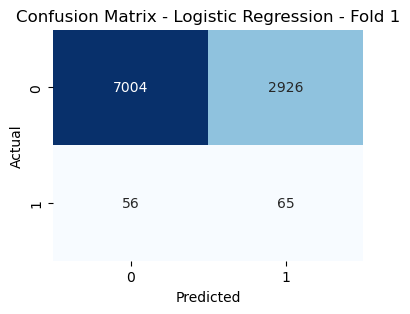


=== Fold 2 ===

- KNN (k=5)
Matrice de confusion :
 [[9692  238]
 [  41   80]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9930
           1       0.25      0.66      0.36       121

    accuracy                           0.97     10051
   macro avg       0.62      0.82      0.68     10051
weighted avg       0.99      0.97      0.98     10051



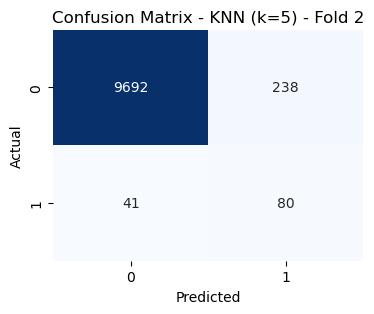


- Random Forest
Matrice de confusion :
 [[9877   53]
 [  47   74]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      9930
           1       0.58      0.61      0.60       121

    accuracy                           0.99     10051
   macro avg       0.79      0.80      0.80     10051
weighted avg       0.99      0.99      0.99     10051



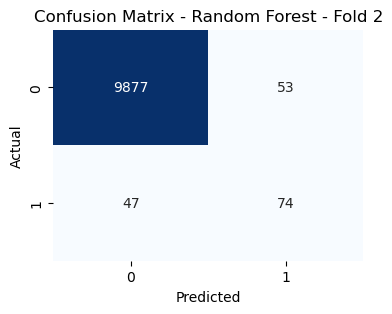


- Logistic Regression
Matrice de confusion :
 [[7064 2866]
 [  45   76]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      9930
           1       0.03      0.63      0.05       121

    accuracy                           0.71     10051
   macro avg       0.51      0.67      0.44     10051
weighted avg       0.98      0.71      0.82     10051



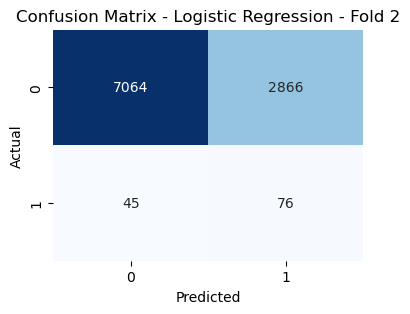


=== Fold 3 ===

- KNN (k=5)
Matrice de confusion :
 [[9687  242]
 [  44   78]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9929
           1       0.24      0.64      0.35       122

    accuracy                           0.97     10051
   macro avg       0.62      0.81      0.67     10051
weighted avg       0.99      0.97      0.98     10051



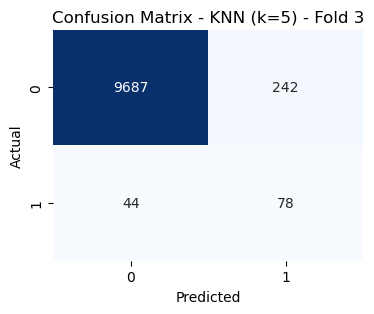


- Random Forest
Matrice de confusion :
 [[9855   74]
 [  45   77]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      9929
           1       0.51      0.63      0.56       122

    accuracy                           0.99     10051
   macro avg       0.75      0.81      0.78     10051
weighted avg       0.99      0.99      0.99     10051



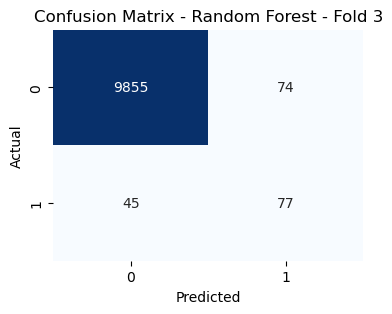


- Logistic Regression
Matrice de confusion :
 [[6978 2951]
 [  44   78]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.70      0.82      9929
           1       0.03      0.64      0.05       122

    accuracy                           0.70     10051
   macro avg       0.51      0.67      0.44     10051
weighted avg       0.98      0.70      0.81     10051



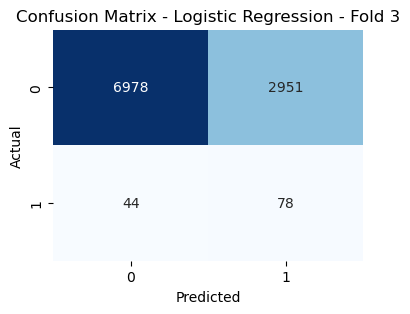


=== Fold 4 ===

- KNN (k=5)
Matrice de confusion :
 [[9666  263]
 [  40   81]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      9929
           1       0.24      0.67      0.35       121

    accuracy                           0.97     10050
   macro avg       0.62      0.82      0.67     10050
weighted avg       0.99      0.97      0.98     10050



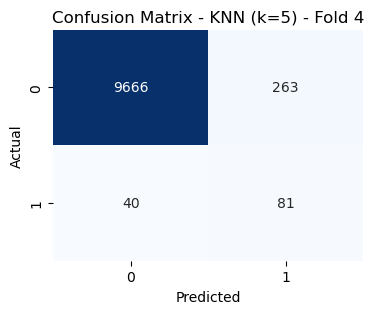


- Random Forest
Matrice de confusion :
 [[9860   69]
 [  40   81]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      9929
           1       0.54      0.67      0.60       121

    accuracy                           0.99     10050
   macro avg       0.77      0.83      0.80     10050
weighted avg       0.99      0.99      0.99     10050



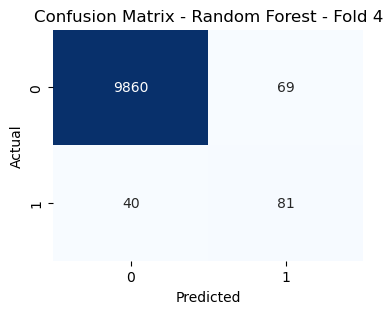


- Logistic Regression
Matrice de confusion :
 [[7013 2916]
 [  42   79]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      9929
           1       0.03      0.65      0.05       121

    accuracy                           0.71     10050
   macro avg       0.51      0.68      0.44     10050
weighted avg       0.98      0.71      0.82     10050



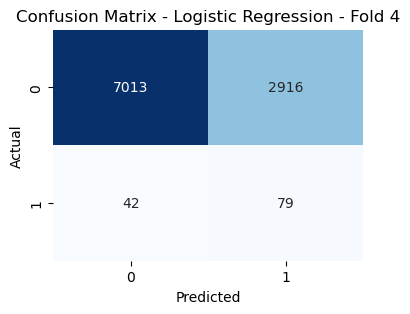


=== Fold 5 ===

- KNN (k=5)
Matrice de confusion :
 [[9675  254]
 [  51   70]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      9929
           1       0.22      0.58      0.31       121

    accuracy                           0.97     10050
   macro avg       0.61      0.78      0.65     10050
weighted avg       0.99      0.97      0.98     10050



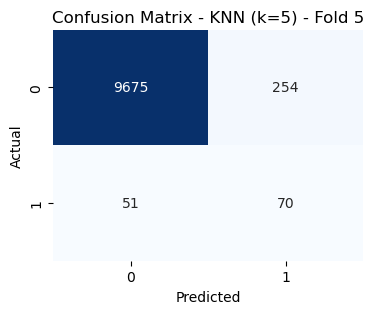


- Random Forest
Matrice de confusion :
 [[9875   54]
 [  57   64]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9929
           1       0.54      0.53      0.54       121

    accuracy                           0.99     10050
   macro avg       0.77      0.76      0.76     10050
weighted avg       0.99      0.99      0.99     10050



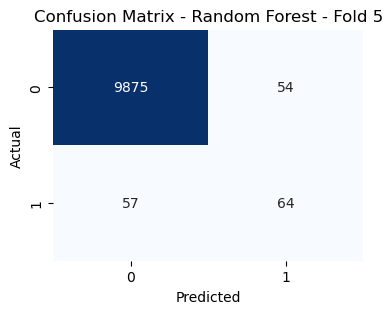


- Logistic Regression
Matrice de confusion :
 [[6872 3057]
 [  36   85]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.69      0.82      9929
           1       0.03      0.70      0.05       121

    accuracy                           0.69     10050
   macro avg       0.51      0.70      0.43     10050
weighted avg       0.98      0.69      0.81     10050



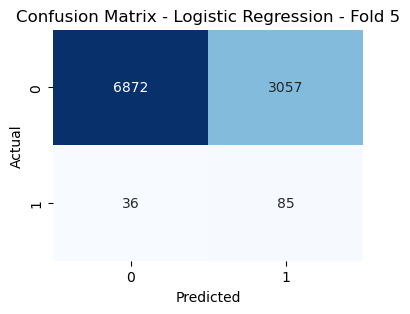


=== Résultats Moyens sur les 5 Folds ===

KNN (k=5):
 - Accuracy moyenne       = 0.9702
 - F1-score moyen         = 0.6630
 - ROC AUC moyen          = 0.8410
 - Average Precision mean = 0.3277

Random Forest:
 - Accuracy moyenne       = 0.9886
 - F1-score moyen         = 0.7802
 - ROC AUC moyen          = 0.8742
 - Average Precision mean = 0.5110

Logistic Regression:
 - Accuracy moyenne       = 0.7027
 - F1-score moyen         = 0.4363
 - ROC AUC moyen          = 0.7114
 - Average Precision mean = 0.0318


In [12]:
# Sélectionner les variables explicatives (X) et la cible (y)
X = df1[['NBRE', 'MCR', 'MDB', 'VALEUR', 'MNT', 'AGE', 'PROVISIONNE', 'le_PROFESSION', 'le_LIBCCL']]
y = df1['SORT']

# Fonction pour visualiser la matrice de confusion
def plot_conf_matrix(cm, model_name):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Models to evaluate
models = {
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced")
}

# Results storage
results = {name: {"accuracy": [], "f1": [], "roc_auc": [], "avg_precision": []} for name in models}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n=== Fold {fold} ===")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    for name, model in models.items():
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        roc_auc = roc_auc_score(y_test, y_proba)
        avg_prec = average_precision_score(y_test, y_proba)

        # Store
        results[name]["accuracy"].append(acc)
        results[name]["f1"].append(f1)
        results[name]["roc_auc"].append(roc_auc)
        results[name]["avg_precision"].append(avg_prec)

        # Output
        print(f"\n- {name}")
        print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
        print("Rapport de classification :\n", classification_report(y_test, y_pred))

        # Plot
        plot_conf_matrix(confusion_matrix(y_test, y_pred), f"{name} - Fold {fold}")

# === Résumé des performances ===
print("\n=== Résultats Moyens sur les 5 Folds ===")
for name, scores in results.items():
    
    print(f"\n{name}:")
    print(f" - Accuracy moyenne       = {np.mean(scores['accuracy']):.4f}")
    print(f" - F1-score moyen         = {np.mean(scores['f1']):.4f}")
    print(f" - ROC AUC moyen          = {np.mean(scores['roc_auc']):.4f}")
    print(f" - Average Precision mean = {np.mean(scores['avg_precision']):.4f}")




## 🧑‍💻 Model Performance Results (5-Fold Cross-Validation)

### KNN (k=5)
- **Accuracy**: 97.02%
- **F1-score**: 0.6630
- **ROC AUC**: 0.8410
- **Average Precision**: 0.3277

### Random Forest
- **Accuracy**: 98.86%
- **F1-score**: 0.7801
- **ROC AUC**: 0.8723
- **Average Precision**: 0.5115

### Logistic Regression
- **Accuracy**: 70.29%
- **F1-score**: 0.4368
- **ROC AUC**: 0.7160
- **Average Precision**: 0.0324

---

## 🚀 Conclusion:
- **Random Forest** is the best model, achieving:
  - **Highest ROC AUC** (0.8723), showing excellent class distinction.
  - **Highest F1-score** (0.7801), balancing precision and recall.
  - **Better Average Precision** (0.5115), indicating better detection of the minority class compared to KNN and Logistic Regression.

- **KNN (k=5)** offers decent performance but falls behind Random Forest in handling the class imbalance and achieving a higher F1-score and Average Precision.

- **Logistic Regression** performs poorly due to the class imbalance, with low accuracy, F1-score, and Average Precision.


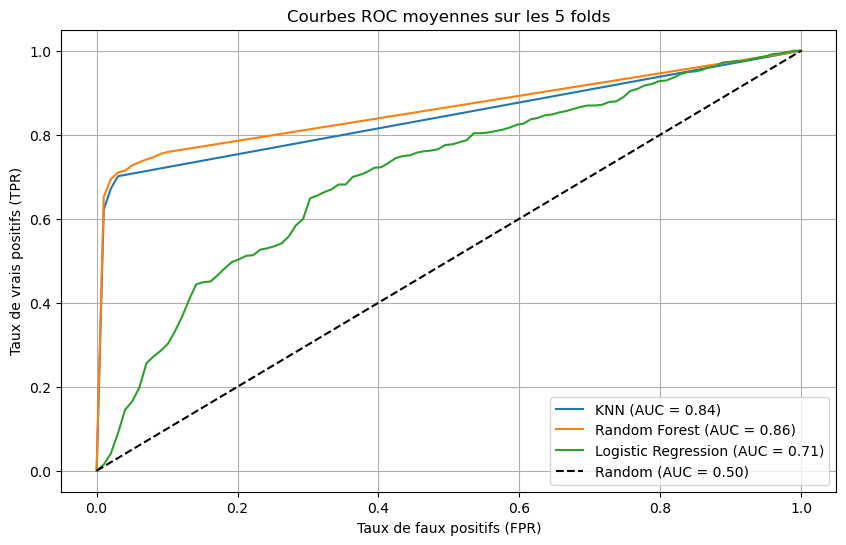

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize containers for ROC metrics
fpr_dict = {"KNN": [], "Random Forest": [], "Logistic Regression": []}
tpr_dict = {"KNN": [], "Random Forest": [], "Logistic Regression": []}
auc_dict = {"KNN": [], "Random Forest": [], "Logistic Regression": []}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Models
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced")
    }

    for name, model in models.items():
        model.fit(X_train_fold, y_train_fold)
        y_scores = model.predict_proba(X_test_fold)[:, 1]  # Probabilities for ROC
        fpr, tpr, _ = roc_curve(y_test_fold, y_scores)
        auc_score = auc(fpr, tpr)

        fpr_dict[name].append(fpr)
        tpr_dict[name].append(tpr)
        auc_dict[name].append(auc_score)

# Plot mean ROC curves
plt.figure(figsize=(10, 6))

for name in models.keys():
    # Interpolate all ROC curves to a common FPR axis
    mean_fpr = np.linspace(0, 1, 100)
    tprs_interp = []
    
    for i in range(len(fpr_dict[name])):
        tpr_interp = np.interp(mean_fpr, fpr_dict[name][i], tpr_dict[name][i])
        tpr_interp[0] = 0.0
        tprs_interp.append(tpr_interp)
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(auc_dict[name])

    plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC moyennes sur les 5 folds")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
## Adding the XGBOOST
## Didn't worked 

# Initialize containers for ROC metrics
model_names = ["KNN", "Random Forest", "Logistic Regression", "XGBoost"]
fpr_dict = {name: [] for name in model_names}
tpr_dict = {name: [] for name in model_names}
auc_dict = {name: [] for name in model_names}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Define models
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train_fold, y_train_fold)
        y_scores = model.predict_proba(X_test_fold)[:, 1]  # Get class 1 probabilities
        fpr, tpr, _ = roc_curve(y_test_fold, y_scores)
        auc_score = auc(fpr, tpr)

        fpr_dict[name].append(fpr)
        tpr_dict[name].append(tpr)
        auc_dict[name].append(auc_score)

# Plot mean ROC curves
plt.figure(figsize=(10, 6))

for name in model_names:
    # Interpolate all ROC curves to a common FPR axis
    mean_fpr = np.linspace(0, 1, 100)
    tprs_interp = []
    
    for i in range(len(fpr_dict[name])):
        tpr_interp = np.interp(mean_fpr, fpr_dict[name][i], tpr_dict[name][i])
        tpr_interp[0] = 0.0
        tprs_interp.append(tpr_interp)
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(auc_dict[name])

    plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Final plot settings
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC moyennes sur les 5 folds")
plt.legend(loc="lower right")
plt.grid()
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
## DF2

In [19]:
 # 1. DATA EXPLORATION
print("# 1. DATA EXPLORATION")
print("\n# Vérifier les premières lignes")
print(df2.head())

print("\n# Vérifier les informations sur le dataset")
print(df2.info())

print("\n# Vérifier les statistiques descriptives")
print(df2.describe())



# 1. DATA EXPLORATION

# Vérifier les premières lignes
   NBRE        MCR       MDB  VALEUR    DATECPS  NUM      MNT         ID  \
0  21.0   6160.260   6127.00      41 2024-10-01  NaN  152.110  6350778.0   
1  31.0   5325.396   5256.26      41 2024-10-01  NaN  112.565  6445711.0   
2  20.0   5899.729   5878.28      41 2024-10-01  NaN   61.880  6851305.0   
3  27.0  10731.612  10663.32      41 2024-10-01  NaN  133.385  1362154.0   
4   2.0      0.000      6.00      41 2024-10-01  NaN   90.700  1477221.0   

         DNA        PROFESSION             LIBCCL SORT  
0 1973-04-15               NaN  Personne physique    R  
1 1978-09-15  AUTRE PROFESSION  Personne physique    P  
2 1974-02-01  AUTRE PROFESSION  Personne physique    P  
3 1977-06-08  AUTRE PROFESSION  Personne physique    R  
4 1969-01-28  AUTRE PROFESSION  Personne physique    R  

# Vérifier les informations sur le dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 12 colum

In [21]:
print(df2)

      NBRE         MCR         MDB  VALEUR    DATECPS  NUM       MNT  \
0     21.0    6160.260    6127.000      41 2024-10-01  NaN   152.110   
1     31.0    5325.396    5256.260      41 2024-10-01  NaN   112.565   
2     20.0    5899.729    5878.280      41 2024-10-01  NaN    61.880   
3     27.0   10731.612   10663.320      41 2024-10-01  NaN   133.385   
4      2.0       0.000       6.000      41 2024-10-01  NaN    90.700   
...    ...         ...         ...     ...        ...  ...       ...   
8922  33.0    5035.416    5036.999      41 2025-03-28  NaN    76.499   
8923  40.0    8556.588    8948.905      41 2025-03-28  NaN    54.260   
8924  76.0   10255.503   10685.998      41 2025-03-28  NaN    51.620   
8925   NaN         NaN         NaN      41 2025-03-28  NaN   130.000   
8926  54.0  137447.000  135713.576      41 2025-03-28  NaN  3401.000   

             ID        DNA                                     PROFESSION  \
0     6350778.0 1973-04-15                                

In [22]:
# 2. DATA PREPARATION
print("\n# 2. DATA PREPARATION")

# Handle missing values
print("\n# Handle missing values")
# Replace NaN in the 'NUM' column with 0 (since the info showed all NUM are null)
if 'NUM' in df2.columns:
    df2['NUM'] = df2['NUM'].fillna(0).astype(float)

# Replace NaN in the 'PROFESSION' column with 'AUTRE PROFESSION'
df2['PROFESSION'] = df2['PROFESSION'].fillna('AUTRE PROFESSION')

# Replace NaN in the 'LIBCCL' column with 'Personne physique'
df2['LIBCCL'] = df2['LIBCCL'].fillna('Personne physique')

# Convert SORT values to match the format in df1 analysis
# Based on your sample, SORT has 'P' and 'R' values; we'll map 'P' to 0 and 'R' to 1
df2['SORT'] = df2['SORT'].map({'P': 0, 'R': 1})

# Fix data types and formats for numerical columns
print("\n# Fix data types and formats")
for col in ['MCR', 'MDB', 'MNT']:
    df2[col] = df2[col].astype(str).str.replace(' ', '').str.replace(',', '.')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Calculate age from birth date (DNA)
print("\n# Calculate age")
df2['DNA'] = pd.to_datetime(df2['DNA'], errors='coerce')
df2['AGE'] = (pd.Timestamp.today() - df2['DNA']).dt.days // 365

# Check for missing values after transformations
print("\n# Missing values after transformations:")
print(df2.isna().sum())



# 2. DATA PREPARATION

# Handle missing values

# Fix data types and formats

# Calculate age

# Missing values after transformations:
NBRE           63
MCR            63
MDB            63
VALEUR          0
DATECPS         0
NUM             0
MNT             2
ID             26
DNA           387
PROFESSION      0
LIBCCL          0
SORT           69
AGE           387
dtype: int64


In [27]:
# 3. FEATURE ENGINEERING
print("\n# 3. FEATURE ENGINEERING")

# Encode categorical variables
print("\n# Encode categorical variables")
le_profession = LabelEncoder()
df2['le_PROFESSION'] = le_profession.fit_transform(df2['PROFESSION'].fillna(''))

le_libccl = LabelEncoder()
df2['le_LIBCCL'] = le_libccl.fit_transform(df2['LIBCCL'].fillna(''))

# Compute skewness for numeric columns
print("\n# Compute skewness")
numeric_cols = df2.select_dtypes(include=['number']).columns
skew_values = df2[numeric_cols].skew()
print("Skewness of numeric columns:")
print(skew_values)

# Impute missing values based on skewness
print("\n# Impute missing values")
# Define columns to impute with median (skewed) or mean (normal)
median_cols = ['NBRE', 'MCR', 'MDB', 'MNT', 'le_PROFESSION', 'le_LIBCCL']
mean_cols = ['VALEUR', 'ID', 'AGE']

# Impute using median for skewed columns
for col in median_cols:
    if col in df2.columns:
        df2[col] = df2[col].fillna(df2[col].median())
        print(f"{col}: Filled NaN with median (high skew)")

# Impute using mean for relatively normal columns
for col in mean_cols:
    if col in df2.columns:
        df2[col] = df2[col].fillna(df2[col].mean())
        print(f"{col}: Filled NaN with mean (low skew)")

df2 = df2.dropna(subset=['SORT'])



# 3. FEATURE ENGINEERING

# Encode categorical variables

# Compute skewness
Skewness of numeric columns:
NBRE              9.465996
MCR              12.940753
MDB              13.014878
VALEUR          -17.774441
NUM               0.000000
MNT               5.864141
ID               14.613414
SORT              0.913000
AGE               0.561929
le_PROFESSION     6.762867
le_LIBCCL        -6.760913
dtype: float64

# Impute missing values
NBRE: Filled NaN with median (high skew)
MCR: Filled NaN with median (high skew)
MDB: Filled NaN with median (high skew)
MNT: Filled NaN with median (high skew)
le_PROFESSION: Filled NaN with median (high skew)
le_LIBCCL: Filled NaN with median (high skew)
VALEUR: Filled NaN with mean (low skew)
ID: Filled NaN with mean (low skew)
AGE: Filled NaN with mean (low skew)


In [28]:
df2

,NBRE,MCR,MDB,VALEUR,DATECPS,NUM,MNT,ID,DNA,PROFESSION,LIBCCL,SORT,AGE,le_PROFESSION,le_LIBCCL
0,21.0,6160.260,6127.000,41,2024-10-01,0.0,152.110,6350778.0,1973-04-15,AUTRE PROFESSION,Personne physique,1.0,52.0,0,3
1,31.0,5325.396,5256.260,41,2024-10-01,0.0,112.565,6445711.0,1978-09-15,AUTRE PROFESSION,Personne physique,0.0,46.0,0,3
2,20.0,5899.729,5878.280,41,2024-10-01,0.0,61.880,6851305.0,1974-02-01,AUTRE PROFESSION,Personne physique,0.0,51.0,0,3
3,27.0,10731.612,10663.320,41,2024-10-01,0.0,133.385,1362154.0,1977-06-08,AUTRE PROFESSION,Personne physique,1.0,47.0,0,3
4,2.0,0.000,6.000,41,2024-10-01,0.0,90.700,1477221.0,1969-01-28,AUTRE PROFESSION,Personne physique,1.0,56.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,20.0,6564.035,6602.760,41,2025-03-28,0.0,101.460,5833789.0,1984-10-05,AUTRE PROFESSION,Personne physique,0.0,40.0,0,3
8922,33.0,5035.416,5036.999,41,2025-03-28,0.0,76.499,6032639.0,1961-07-20,Mecaniciens et regleurs de vehicules a moteur,Personne physique,0.0,63.0,20,3
8923,40.0,8556.588,8948.905,41,2025-03-28,0.0,54.260,6060142.0,1969-07-25,RETRAITE,Personne physique,0.0,55.0,25,3
8924,76.0,10255.503,10685.998,41,2025-03-28,0.0,51.620,6101753.0,1959-02-10,RETRAITE,Personne physique,0.0,66.0,25,3


In [29]:
df2.SORT

0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
8921    0.0
8922    0.0
8923    0.0
8924    0.0
8926    0.0
Name: SORT, Length: 8858, dtype: float64


# 4. MODEL BUILDING AND EVALUATION

# Cross-validation results

=== Fold 1 ===

- KNN (k=5)
Matrice de confusion :
 [[1044  210]
 [ 132  386]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1254
         1.0       0.65      0.75      0.69       518

    accuracy                           0.81      1772
   macro avg       0.77      0.79      0.78      1772
weighted avg       0.82      0.81      0.81      1772



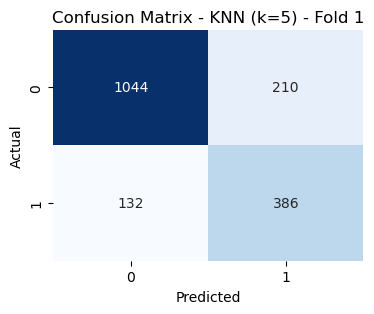


- Random Forest
Matrice de confusion :
 [[1134  120]
 [ 146  372]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1254
         1.0       0.76      0.72      0.74       518

    accuracy                           0.85      1772
   macro avg       0.82      0.81      0.82      1772
weighted avg       0.85      0.85      0.85      1772



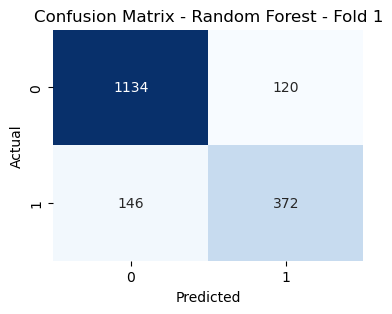


- Logistic Regression
Matrice de confusion :
 [[720 534]
 [137 381]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.84      0.57      0.68      1254
         1.0       0.42      0.74      0.53       518

    accuracy                           0.62      1772
   macro avg       0.63      0.65      0.61      1772
weighted avg       0.72      0.62      0.64      1772



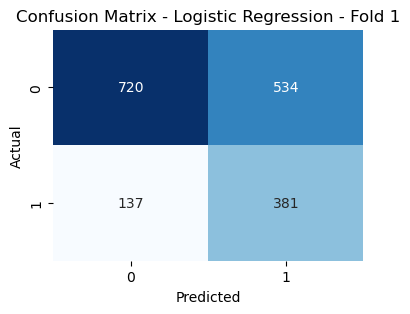


=== Fold 2 ===

- KNN (k=5)
Matrice de confusion :
 [[1033  221]
 [ 138  380]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1254
         1.0       0.63      0.73      0.68       518

    accuracy                           0.80      1772
   macro avg       0.76      0.78      0.77      1772
weighted avg       0.81      0.80      0.80      1772



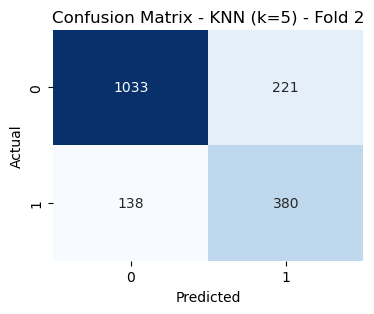


- Random Forest
Matrice de confusion :
 [[1111  143]
 [ 146  372]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1254
         1.0       0.72      0.72      0.72       518

    accuracy                           0.84      1772
   macro avg       0.80      0.80      0.80      1772
weighted avg       0.84      0.84      0.84      1772



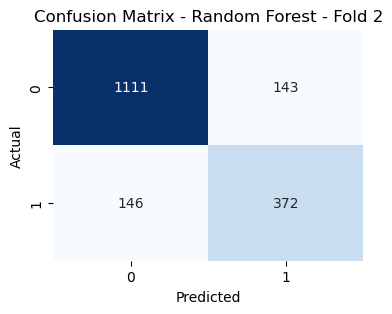


- Logistic Regression
Matrice de confusion :
 [[684 570]
 [133 385]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.84      0.55      0.66      1254
         1.0       0.40      0.74      0.52       518

    accuracy                           0.60      1772
   macro avg       0.62      0.64      0.59      1772
weighted avg       0.71      0.60      0.62      1772



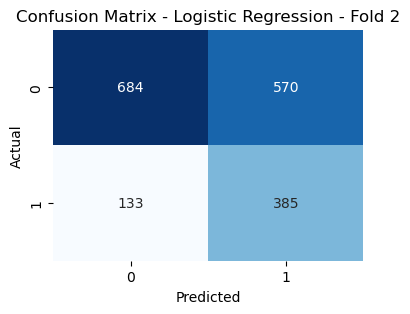


=== Fold 3 ===

- KNN (k=5)
Matrice de confusion :
 [[1077  177]
 [ 151  367]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1254
         1.0       0.67      0.71      0.69       518

    accuracy                           0.81      1772
   macro avg       0.78      0.78      0.78      1772
weighted avg       0.82      0.81      0.82      1772



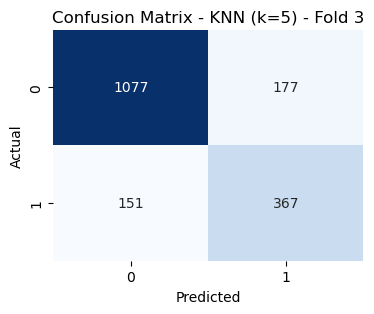


- Random Forest
Matrice de confusion :
 [[1132  122]
 [ 163  355]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1254
         1.0       0.74      0.69      0.71       518

    accuracy                           0.84      1772
   macro avg       0.81      0.79      0.80      1772
weighted avg       0.84      0.84      0.84      1772



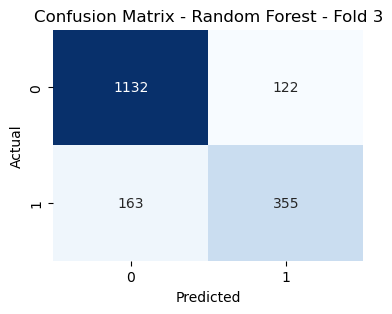


- Logistic Regression
Matrice de confusion :
 [[729 525]
 [157 361]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.82      0.58      0.68      1254
         1.0       0.41      0.70      0.51       518

    accuracy                           0.62      1772
   macro avg       0.62      0.64      0.60      1772
weighted avg       0.70      0.62      0.63      1772



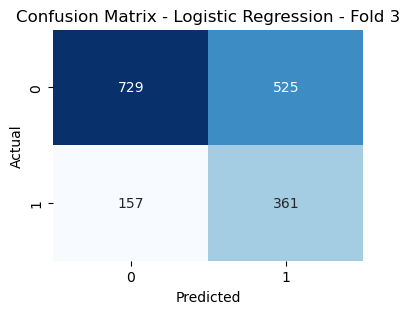


=== Fold 4 ===

- KNN (k=5)
Matrice de confusion :
 [[1019  234]
 [ 137  381]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.85      1253
         1.0       0.62      0.74      0.67       518

    accuracy                           0.79      1771
   macro avg       0.75      0.77      0.76      1771
weighted avg       0.80      0.79      0.80      1771



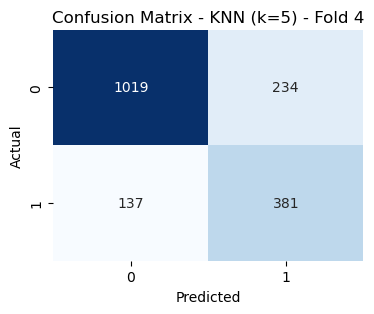


- Random Forest
Matrice de confusion :
 [[1117  136]
 [ 144  374]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1253
         1.0       0.73      0.72      0.73       518

    accuracy                           0.84      1771
   macro avg       0.81      0.81      0.81      1771
weighted avg       0.84      0.84      0.84      1771



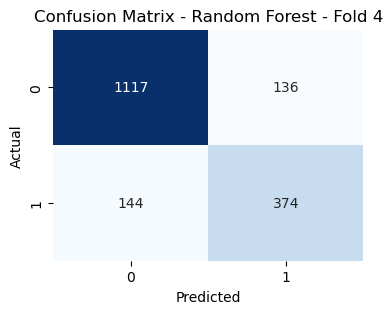


- Logistic Regression
Matrice de confusion :
 [[694 559]
 [146 372]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.83      0.55      0.66      1253
         1.0       0.40      0.72      0.51       518

    accuracy                           0.60      1771
   macro avg       0.61      0.64      0.59      1771
weighted avg       0.70      0.60      0.62      1771



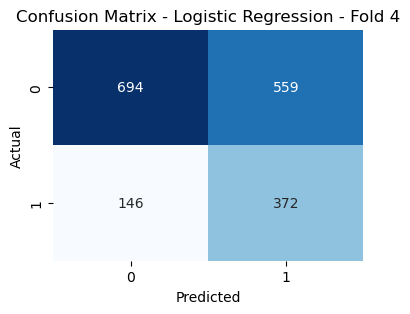


=== Fold 5 ===

- KNN (k=5)
Matrice de confusion :
 [[1059  194]
 [ 124  394]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      1253
         1.0       0.67      0.76      0.71       518

    accuracy                           0.82      1771
   macro avg       0.78      0.80      0.79      1771
weighted avg       0.83      0.82      0.82      1771



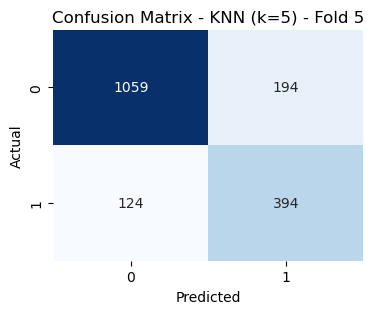


- Random Forest
Matrice de confusion :
 [[1146  107]
 [ 136  382]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1253
         1.0       0.78      0.74      0.76       518

    accuracy                           0.86      1771
   macro avg       0.84      0.83      0.83      1771
weighted avg       0.86      0.86      0.86      1771



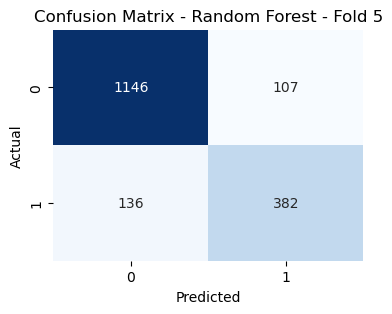


- Logistic Regression
Matrice de confusion :
 [[709 544]
 [139 379]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.84      0.57      0.67      1253
         1.0       0.41      0.73      0.53       518

    accuracy                           0.61      1771
   macro avg       0.62      0.65      0.60      1771
weighted avg       0.71      0.61      0.63      1771



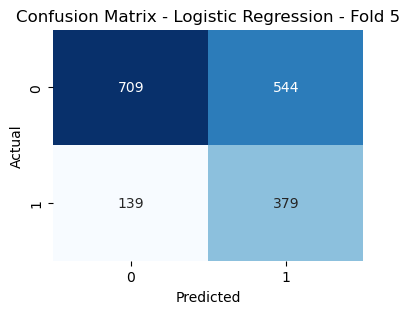


=== Résultats Moyens sur les 5 Folds ===

KNN (k=5):
 - Accuracy moyenne       = 0.8061
 - F1-score moyen         = 0.7743
 - ROC AUC moyen          = 0.8441
 - Average Precision mean = 0.7119

Random Forest:
 - Accuracy moyenne       = 0.8461
 - F1-score moyen         = 0.8118
 - ROC AUC moyen          = 0.8788
 - Average Precision mean = 0.8049

Logistic Regression:
 - Accuracy moyenne       = 0.6112
 - F1-score moyen         = 0.5970
 - ROC AUC moyen          = 0.7114
 - Average Precision mean = 0.5062


In [30]:
# 4. MODEL BUILDING AND EVALUATION
print("\n# 4. MODEL BUILDING AND EVALUATION")

# Select features and target
X = df2[['NBRE', 'MCR', 'MDB', 'VALEUR', 'MNT', 'AGE', 'le_PROFESSION', 'le_LIBCCL']]
y = df2['SORT']

# Function to visualize confusion matrix
def plot_conf_matrix(cm, model_name):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Models to evaluate
models = {
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced")
}

# Results storage
results = {name: {"accuracy": [], "f1": [], "roc_auc": [], "avg_precision": []} for name in models}

# Perform cross-validation
print("\n# Cross-validation results")
# We'll use 5-fold cross-validation like in the original code
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n=== Fold {fold} ===")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    for name, model in models.items():
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        
        # For ROC and precision-recall curves, we need probabilities
        try:
            y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1
        except:
            # Some models might not have predict_proba
            y_proba = y_pred
        
        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        
        # Ensure there are both classes in the test set for ROC calculations
        if len(np.unique(y_test)) > 1:
            roc_auc = roc_auc_score(y_test, y_proba)
            avg_prec = average_precision_score(y_test, y_proba)
        else:
            roc_auc = np.nan
            avg_prec = np.nan
        
        # Store results
        results[name]["accuracy"].append(acc)
        results[name]["f1"].append(f1)
        results[name]["roc_auc"].append(roc_auc)
        results[name]["avg_precision"].append(avg_prec)
        
        # Output current results
        print(f"\n- {name}")
        print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
        print("Rapport de classification :\n", classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        plot_conf_matrix(confusion_matrix(y_test, y_pred), f"{name} - Fold {fold}")

# Display summary of results
print("\n=== Résultats Moyens sur les 5 Folds ===")
for name, scores in results.items():
    print(f"\n{name}:")
    print(f" - Accuracy moyenne       = {np.nanmean(scores['accuracy']):.4f}")
    print(f" - F1-score moyen         = {np.nanmean(scores['f1']):.4f}")
    print(f" - ROC AUC moyen          = {np.nanmean(scores['roc_auc']):.4f}")
    print(f" - Average Precision mean = {np.nanmean(scores['avg_precision']):.4f}")




## 🧪 Model Performance Results (5-Fold Cross-Validation)

### KNN (k=5)
- **Accuracy**: 80.61%
- **F1-score**: 0.7743
- **ROC AUC**: 0.8441
- **Average Precision**: 0.7119

### Random Forest
- **Accuracy**: 84.61%
- **F1-score**: 0.8118
- **ROC AUC**: 0.8788
- **Average Precision**: 0.8049

### Logistic Regression
- **Accuracy**: 61.12%
- **F1-score**: 0.5970
- **ROC AUC**: 0.7114
- **Average Precision**: 0.5062

---

## 🚀 Conclusion:
- **Random Forest** is the top-performing model:
  - **Highest ROC AUC** (0.8788), indicating strong class separation.
  - **Best F1-score** (0.8118), showing a solid balance between precision and recall.
  - **Highest Average Precision** (0.8049), which is especially important in the context of class imbalance.

- **KNN (k=5)** performs reasonably well, with good scores overall, but it lags slightly behind Random Forest in all key metrics.

- **Logistic Regression** shows the weakest performance, struggling particularly with the imbalanced nature of the data — as reflected in its lower F1-score, ROC AUC, and Average Precision.



# 5. ROC CURVE VISUALIZATION


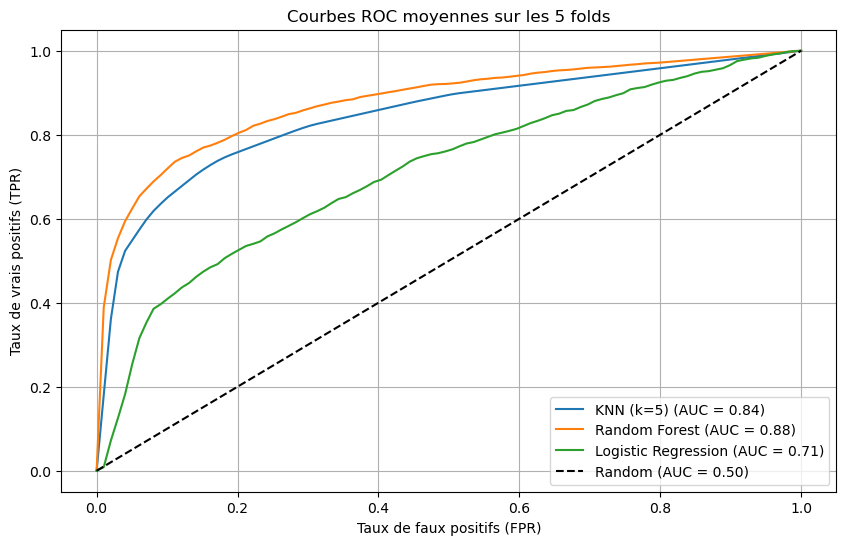


# 6. FEATURE IMPORTANCE
Feature Importance from Random Forest:
         Feature  Importance
1            MCR    0.246544
2            MDB    0.210469
0           NBRE    0.202902
4            MNT    0.191550
5            AGE    0.129984
6  le_PROFESSION    0.008431
7      le_LIBCCL    0.005562
3         VALEUR    0.004558


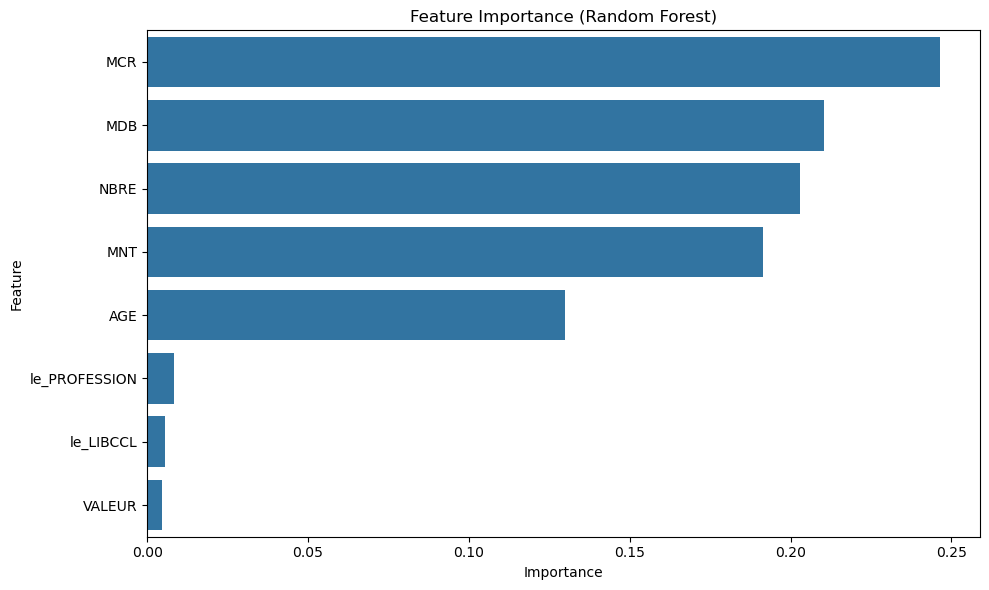


# 7. CONCLUSION
The best model based on F1-score is: Random Forest
With average metrics:
 - Accuracy: 0.8461
 - F1-score: 0.8118
 - ROC AUC: 0.8788
 - Average Precision: 0.8049


In [31]:

# 5. ROC CURVE VISUALIZATION
print("\n# 5. ROC CURVE VISUALIZATION")

# Initialize containers for ROC metrics
fpr_dict = {name: [] for name in models.keys()}
tpr_dict = {name: [] for name in models.keys()}
auc_dict = {name: [] for name in models.keys()}

# Re-run cross-validation for ROC curve data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)
    
    for name, model in models.items():
        model.fit(X_train_res, y_train_res)
        
        # Get probabilities for class 1
        try:
            y_scores = model.predict_proba(X_test_fold)[:, 1]
        except:
            # Fallback for models without predict_proba
            y_scores = model.predict(X_test_fold)
        
        # Only calculate ROC if there are samples from both classes
        if len(np.unique(y_test_fold)) > 1:
            fpr, tpr, _ = roc_curve(y_test_fold, y_scores)
            auc_score = auc(fpr, tpr)
            
            fpr_dict[name].append(fpr)
            tpr_dict[name].append(tpr)
            auc_dict[name].append(auc_score)

# Plot mean ROC curves
plt.figure(figsize=(10, 6))

for name in models.keys():
    if not fpr_dict[name]:  # Skip if no data was collected
        print(f"No ROC data for {name}")
        continue
        
    # Interpolate all ROC curves to a common FPR axis
    mean_fpr = np.linspace(0, 1, 100)
    tprs_interp = []
    
    for i in range(len(fpr_dict[name])):
        if len(fpr_dict[name][i]) < 2:  # Skip if not enough points for interpolation
            continue
        tpr_interp = np.interp(mean_fpr, fpr_dict[name][i], tpr_dict[name][i])
        tpr_interp[0] = 0.0
        tprs_interp.append(tpr_interp)
    
    if tprs_interp:  # Only plot if we have valid data
        mean_tpr = np.mean(tprs_interp, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = np.nanmean(auc_dict[name])
        
        plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Final plot settings
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC moyennes sur les 5 folds")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 6. FEATURE IMPORTANCE (for Random Forest)
print("\n# 6. FEATURE IMPORTANCE")

# Fit Random Forest on the whole dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Apply SMOTE first
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
rf_model.fit(X_res, y_res)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance from Random Forest:")
print(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# 7. CONCLUSION
print("\n# 7. CONCLUSION")
best_model = max(results, key=lambda x: np.nanmean(results[x]["f1"]))
print(f"The best model based on F1-score is: {best_model}")
print(f"With average metrics:")
print(f" - Accuracy: {np.nanmean(results[best_model]['accuracy']):.4f}")
print(f" - F1-score: {np.nanmean(results[best_model]['f1']):.4f}")
print(f" - ROC AUC: {np.nanmean(results[best_model]['roc_auc']):.4f}")
print(f" - Average Precision: {np.nanmean(results[best_model]['avg_precision']):.4f}")